In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import glob
import itertools
import os

import results

In [2]:
log_path = '/home/fiit/logs'
paths = glob.glob(os.path.join(log_path, '*', '*', '*'))

runs = [results.Run(path) for path in paths]


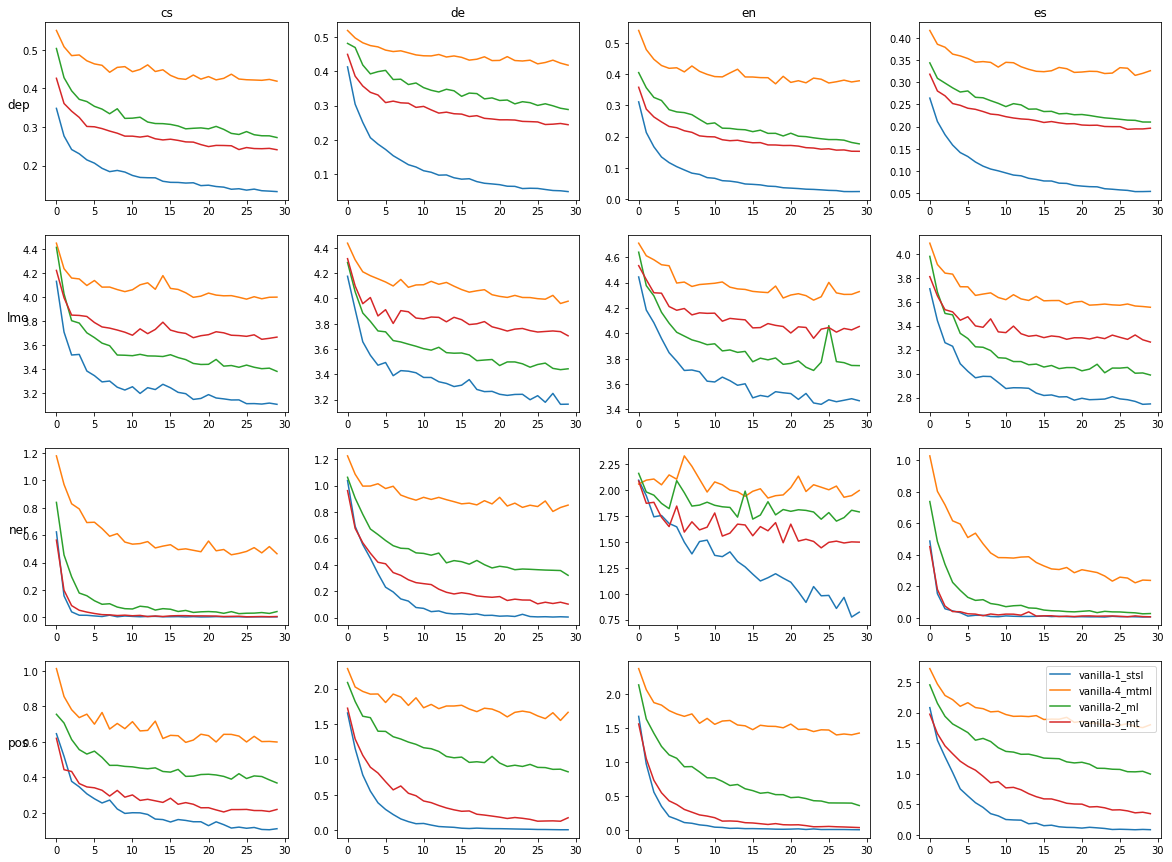

In [31]:
def draw_graphs(metric_func, tasks, langs, role, run_codes=None, run_types=None):
    fig, axes = plt.subplots(len(tasks), len(langs), figsize=(20, 15))

    relevant_runs = ['vanilla']

    for task, lang in itertools.product(tasks, langs):
        for run in runs:
            if (
                run.contains(task, lang) and
                (run_codes is None or run.code in run_codes) and
                (run_types is None or run.type in run_types)
            ):

                history = run.history(
                    metric=metric_func(task),
                    task=task,
                    language=lang,
                    role=role)
                axes[tasks.index(task), langs.index(lang)].plot(list(history), label=f'{run.code}-{run.type}')

    for ax, col in zip(axes[0], langs):
        ax.set_title(col)

    for ax, row in zip(axes[:, 0], tasks):
        ax.set_ylabel(row, rotation=0, size='large')

    plt.legend()        
    plt.show()
    
tasks = ['dep', 'lmo', 'ner', 'pos']
langs = ['cs', 'de', 'en', 'es']

draw_graphs(lambda _: 'loss', tasks, langs, 'train', run_codes=['vanilla'])
        
        

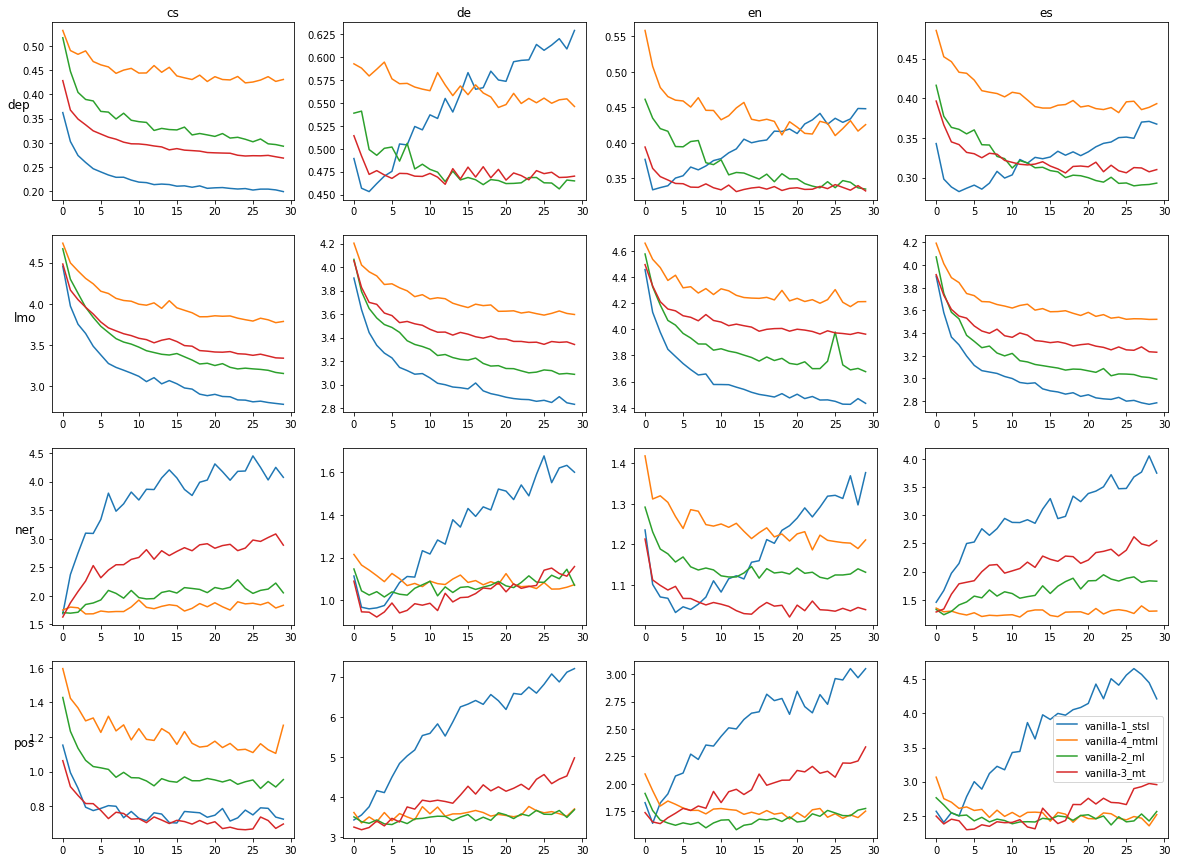

In [5]:
draw_graphs(lambda _: 'loss', tasks, langs, 'test', ['vanilla'])

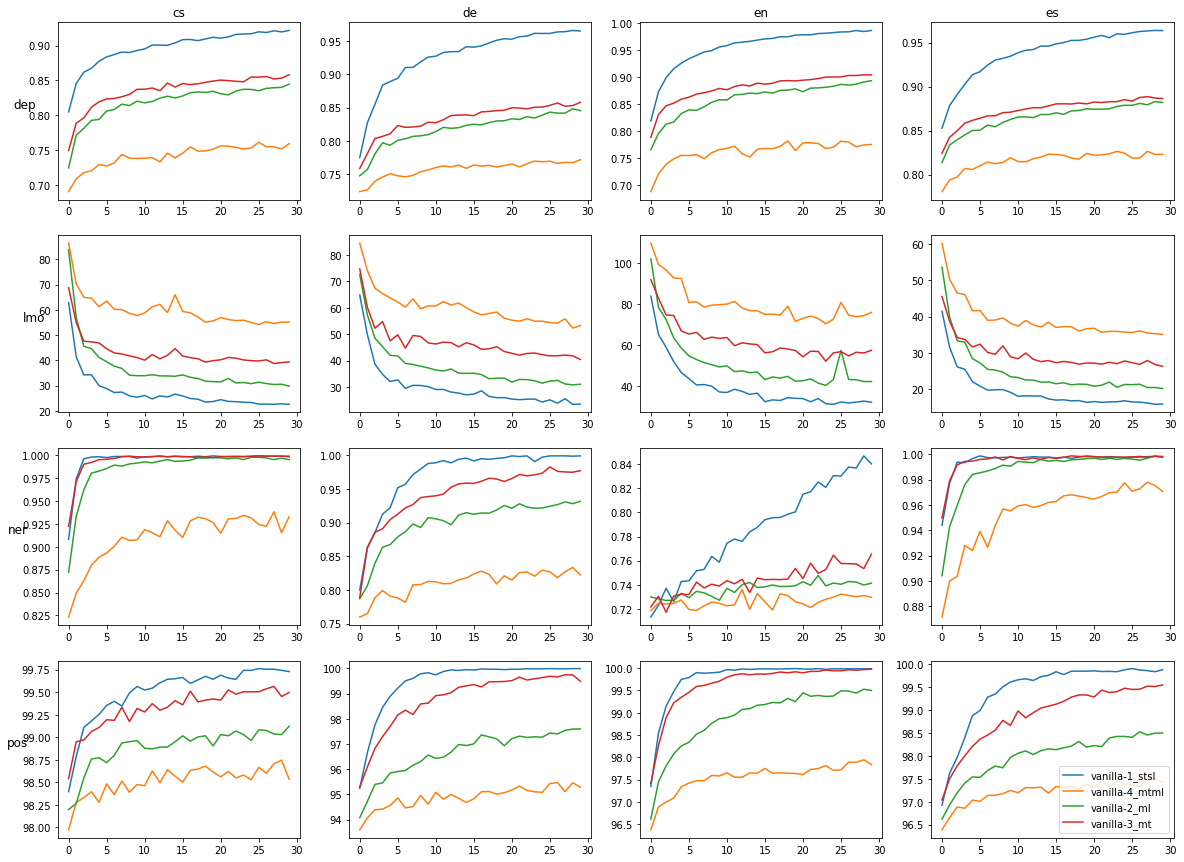

In [7]:
task_metr = {
    'dep': 'las',
    'lmo': 'perplexity',
    'ner': 'chunk_f1',
    'pos': 'acc'
}

draw_graphs(lambda task: task_metr[task], tasks, langs, 'train', ['vanilla'])

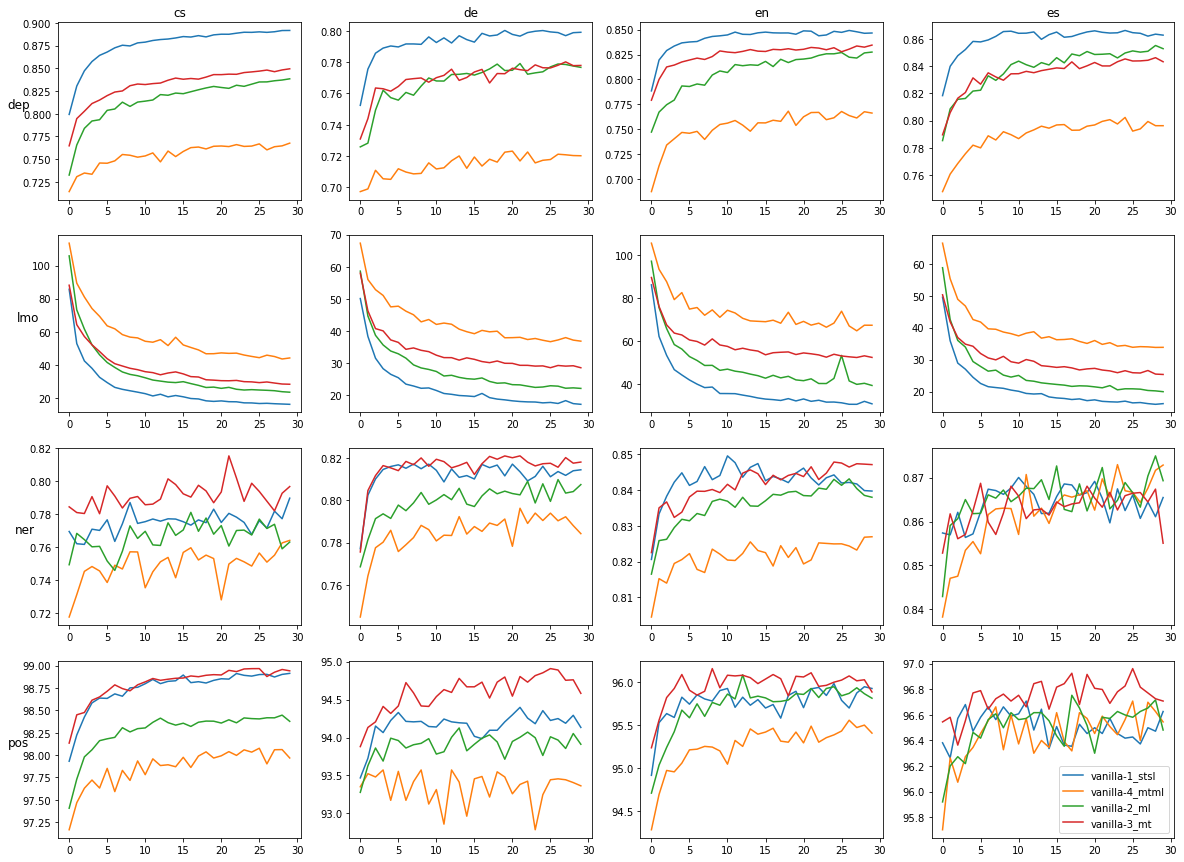

In [8]:
draw_graphs(lambda task: task_metr[task], tasks, langs, 'test', ['vanilla'])

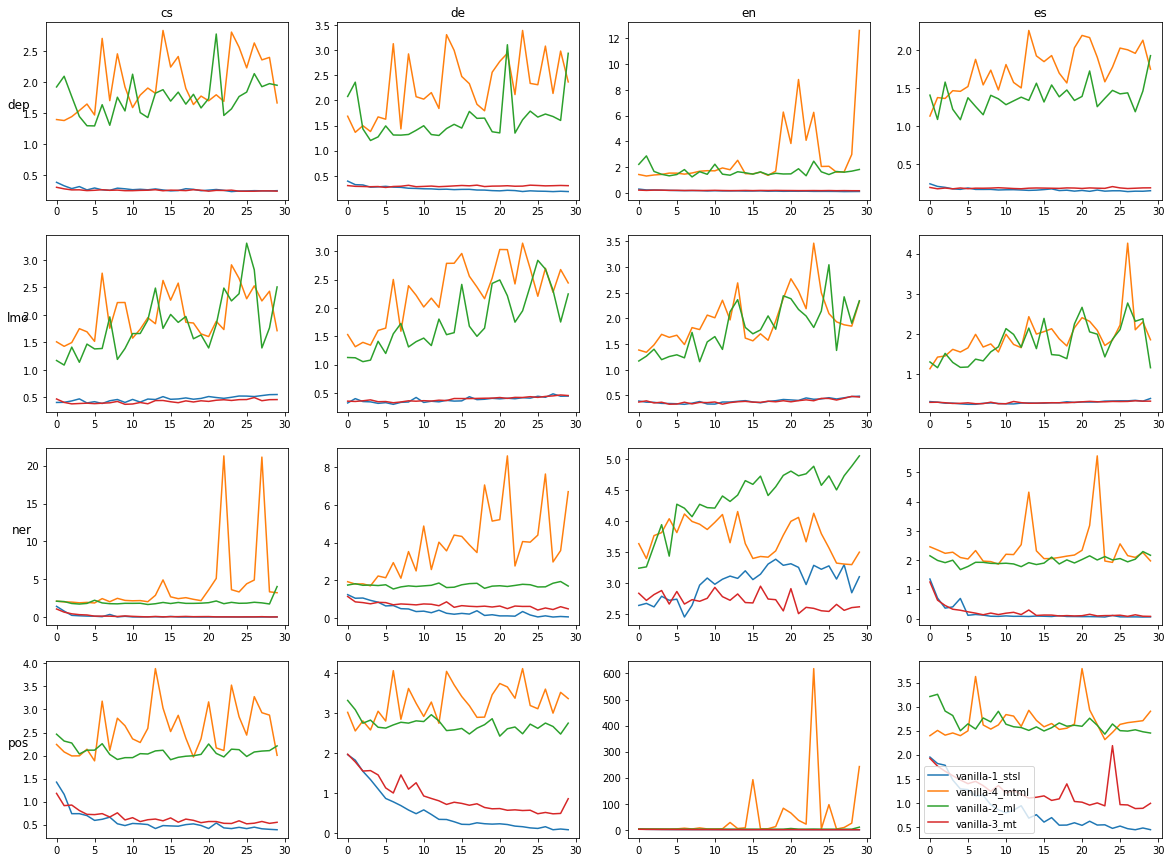

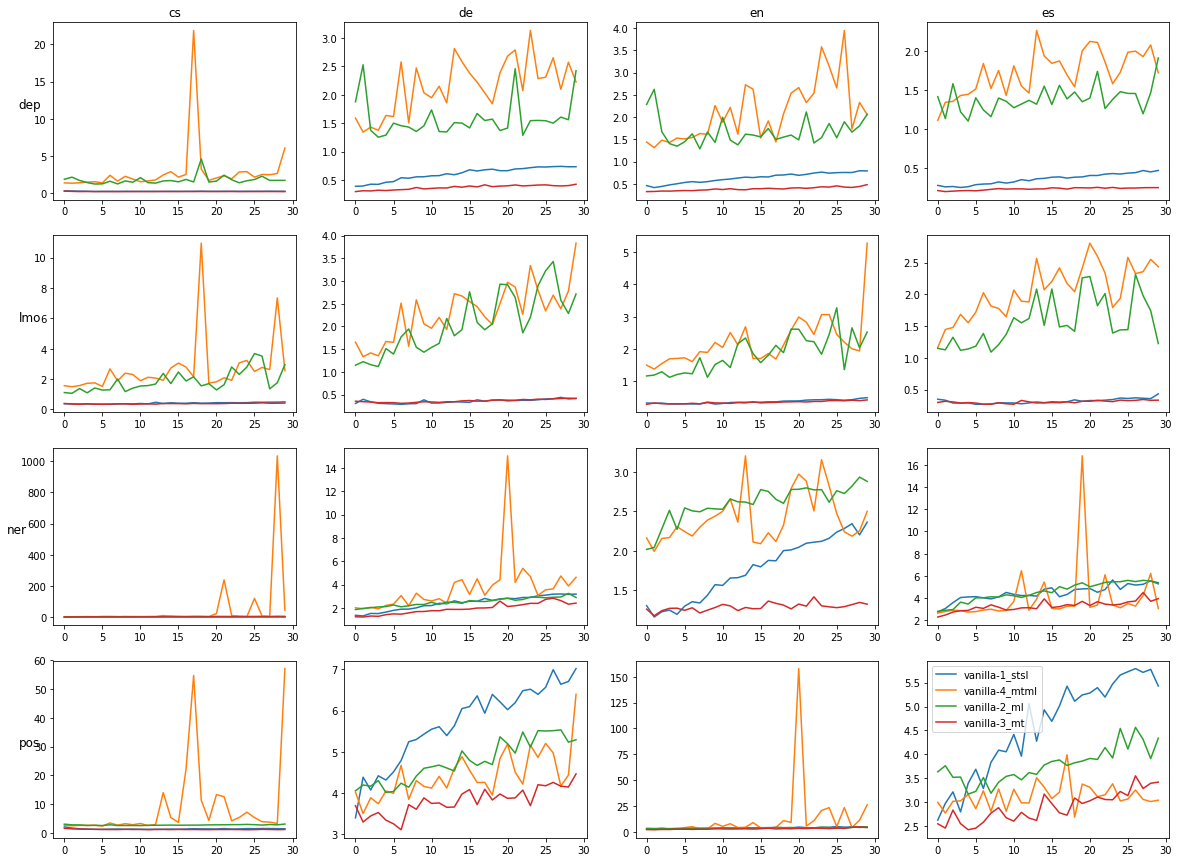

In [9]:
draw_graphs(lambda _: 'gradient_norm', tasks, langs, 'train', ['vanilla'])
draw_graphs(lambda _: 'gradient_norm', tasks, langs, 'test', ['vanilla'])

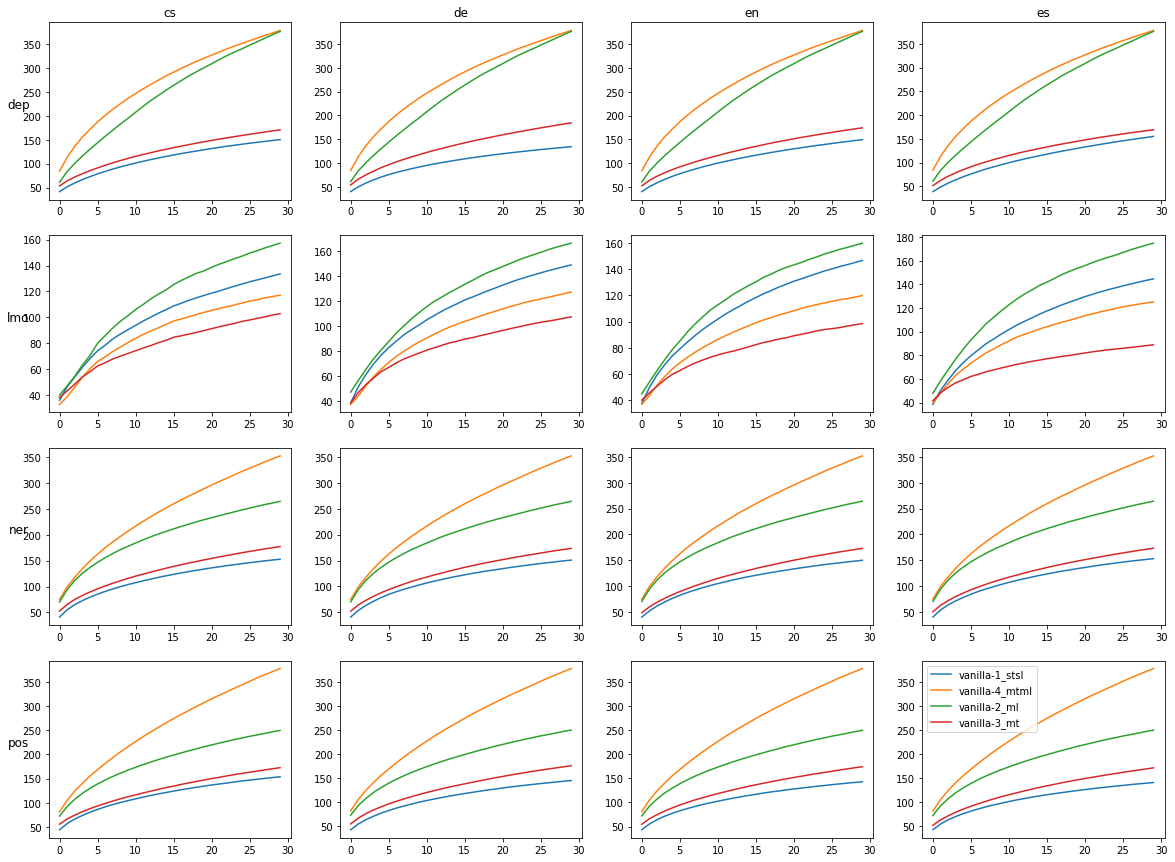

In [14]:
draw_graphs(lambda _: 'cont_repr_weights_norm', tasks, langs, 'train', ['vanilla'])

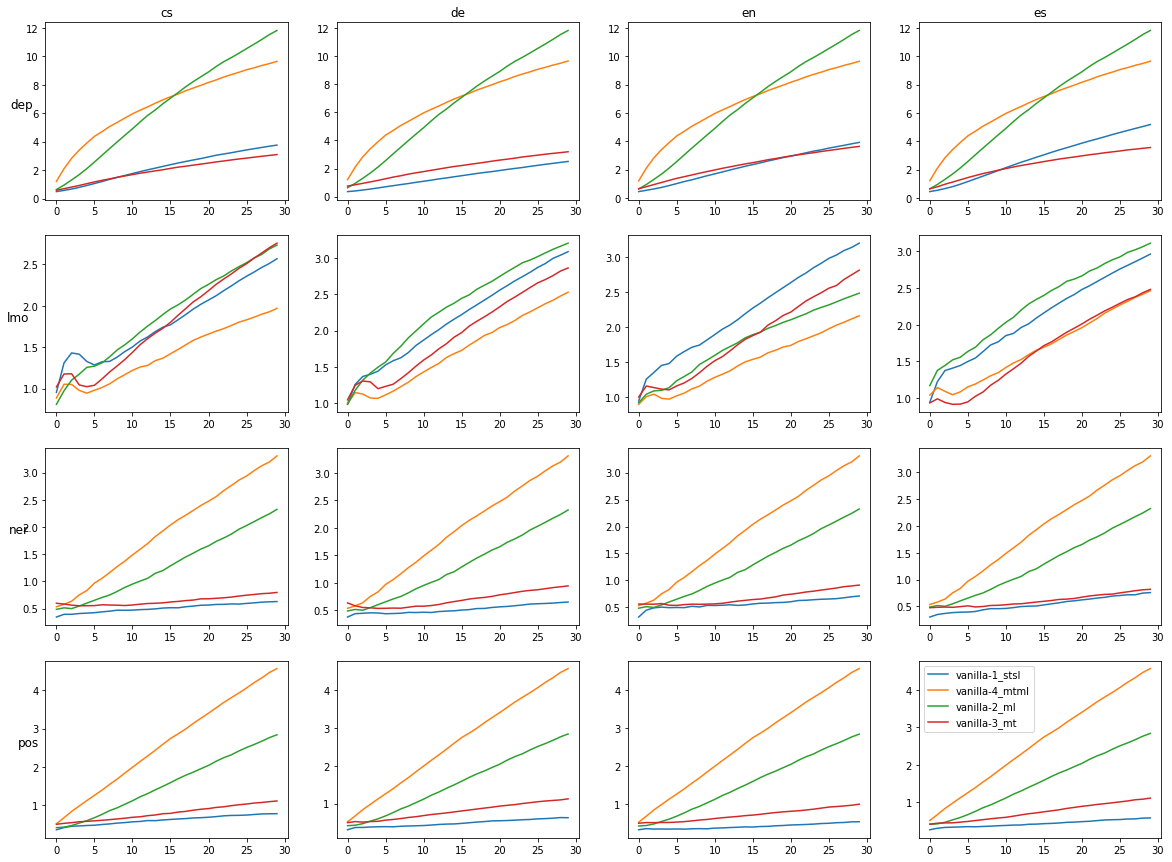

In [17]:
draw_graphs(lambda _: 'cont_repr_weights_input_norm_std', tasks, langs, 'train', ['vanilla'])

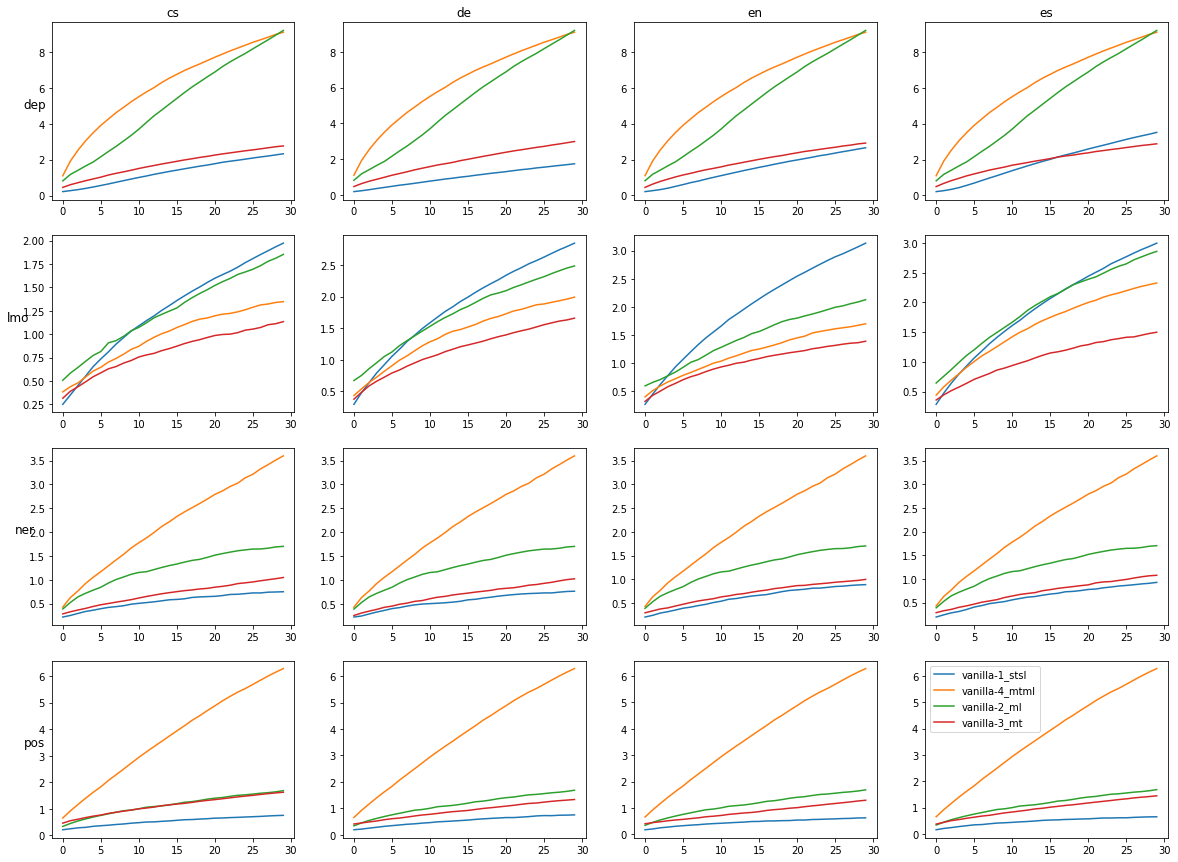

In [18]:
draw_graphs(lambda _: 'cont_repr_weights_output_norm_std', tasks, langs, 'train', ['vanilla'])

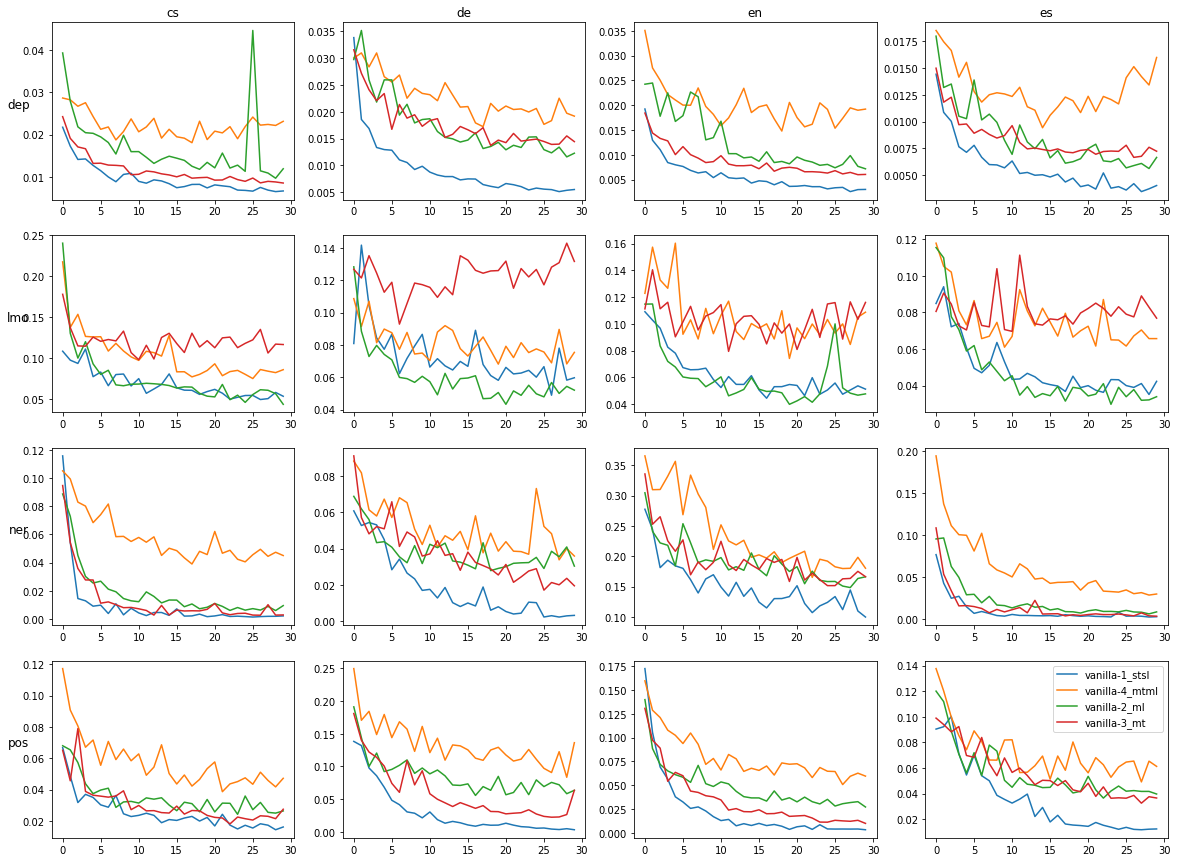

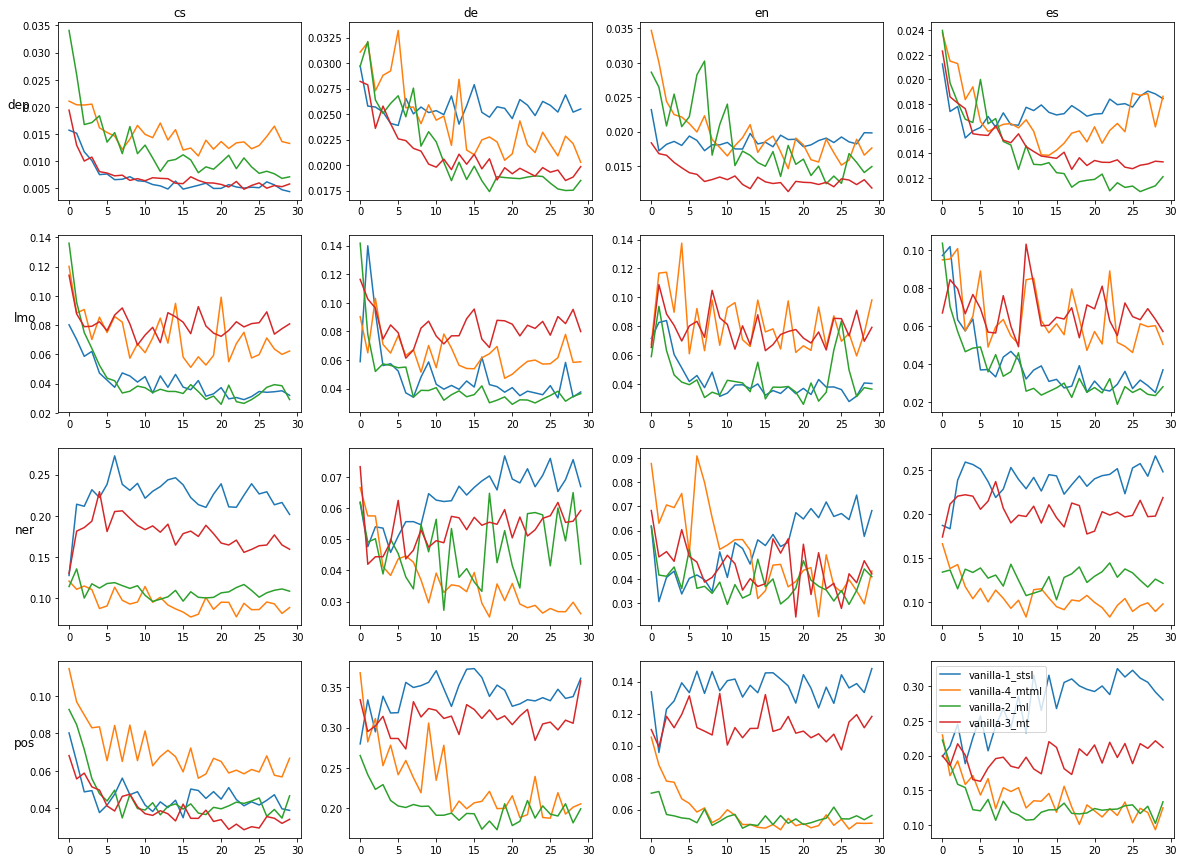

In [16]:
draw_graphs(lambda _: 'cont_repr_weights_grad_norm', tasks, langs, 'train', ['vanilla'])
draw_graphs(lambda _: 'cont_repr_weights_grad_norm', tasks, langs, 'test', ['vanilla'])

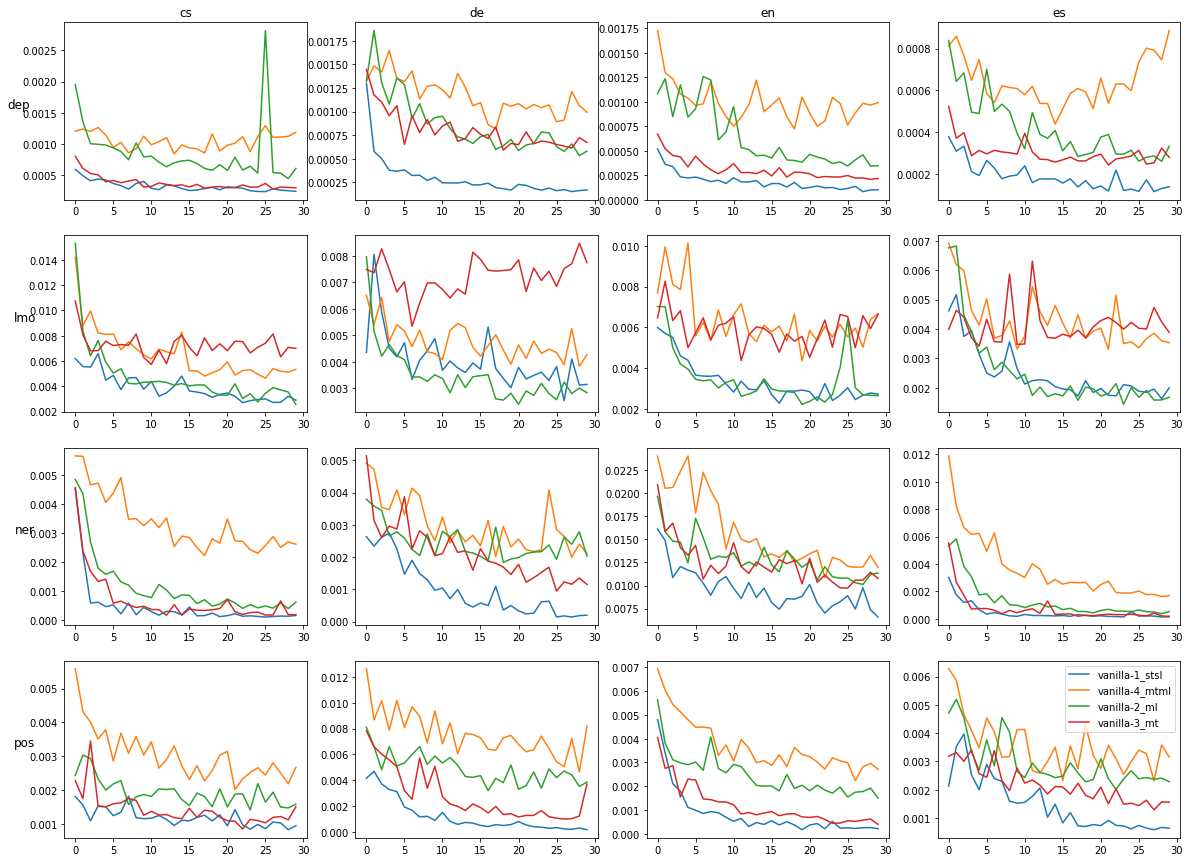

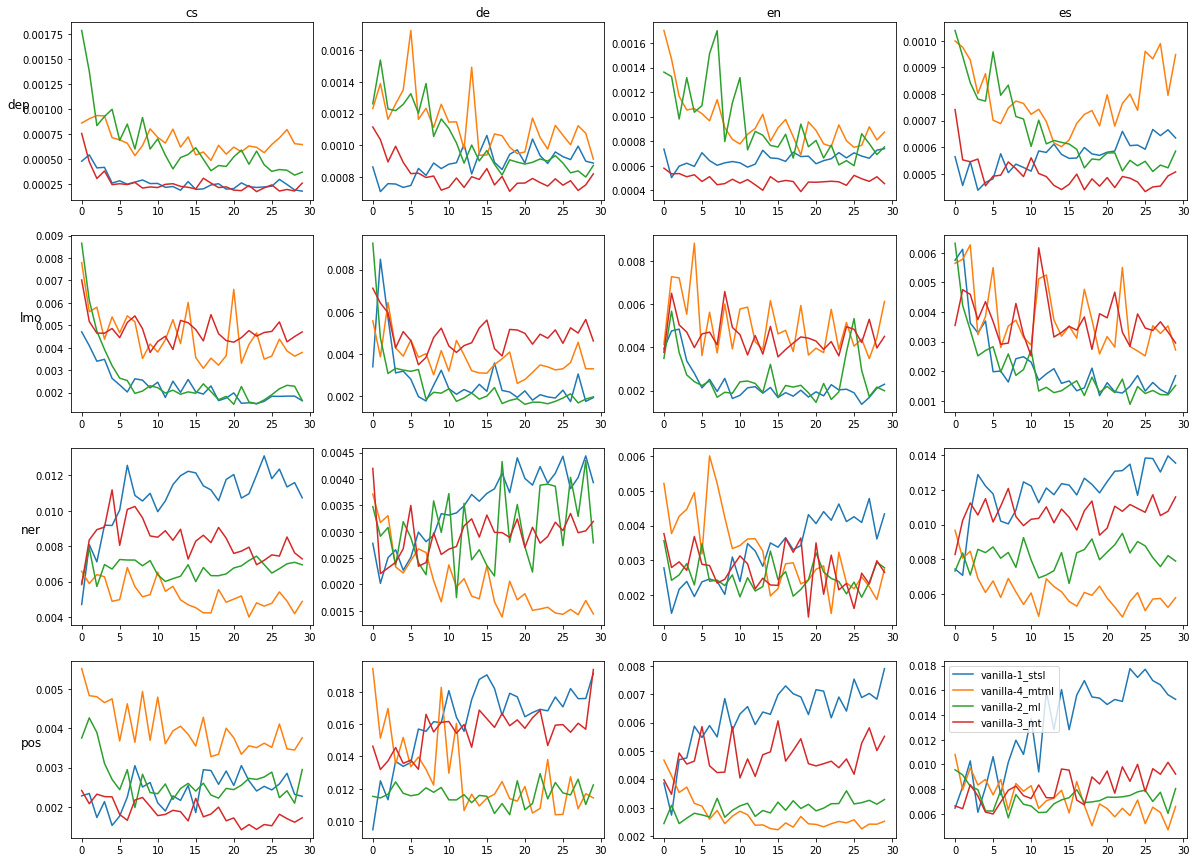

In [21]:
draw_graphs(lambda _: 'cont_repr_weights_grad_input_norm_std', tasks, langs, 'train', ['vanilla'])
draw_graphs(lambda _: 'cont_repr_weights_grad_input_norm_std', tasks, langs, 'test', ['vanilla'])

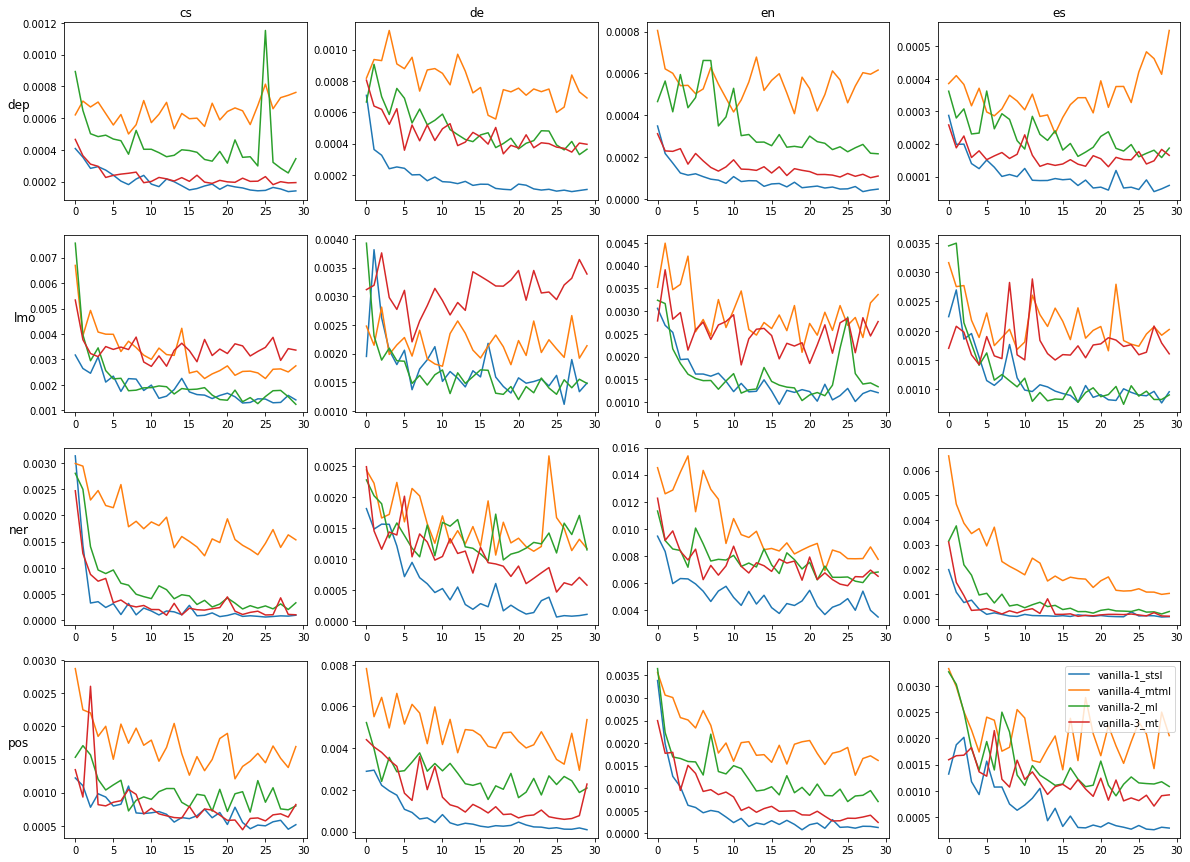

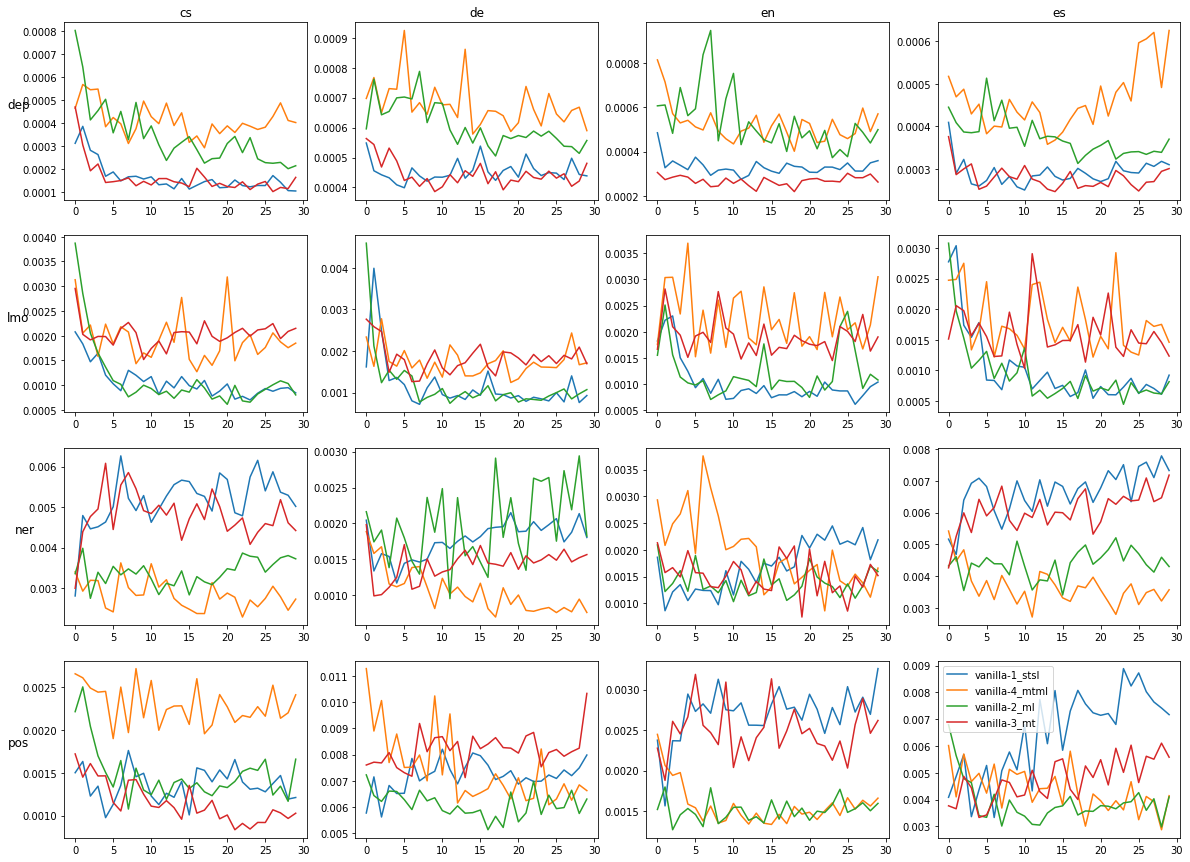

In [22]:
draw_graphs(lambda _: 'cont_repr_weights_grad_output_norm_std', tasks, langs, 'train', ['vanilla'])
draw_graphs(lambda _: 'cont_repr_weights_grad_output_norm_std', tasks, langs, 'test', ['vanilla'])

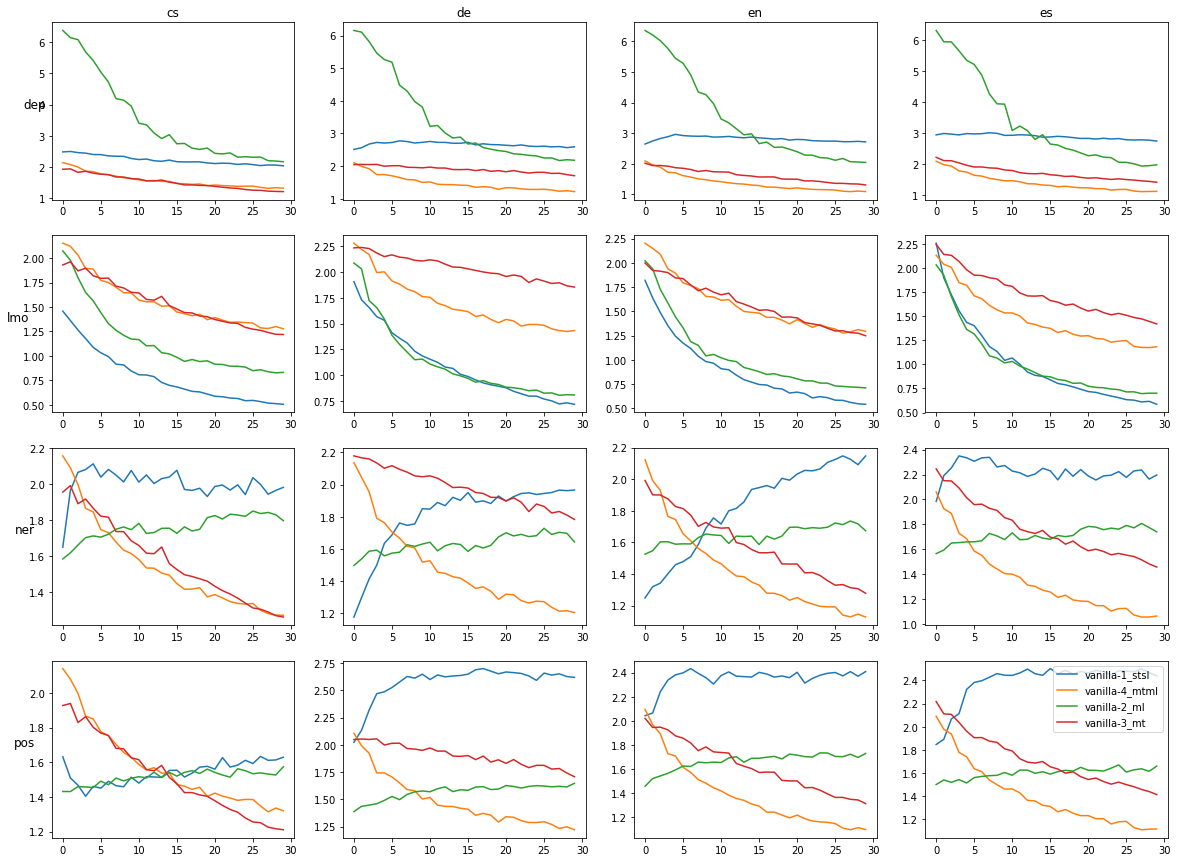

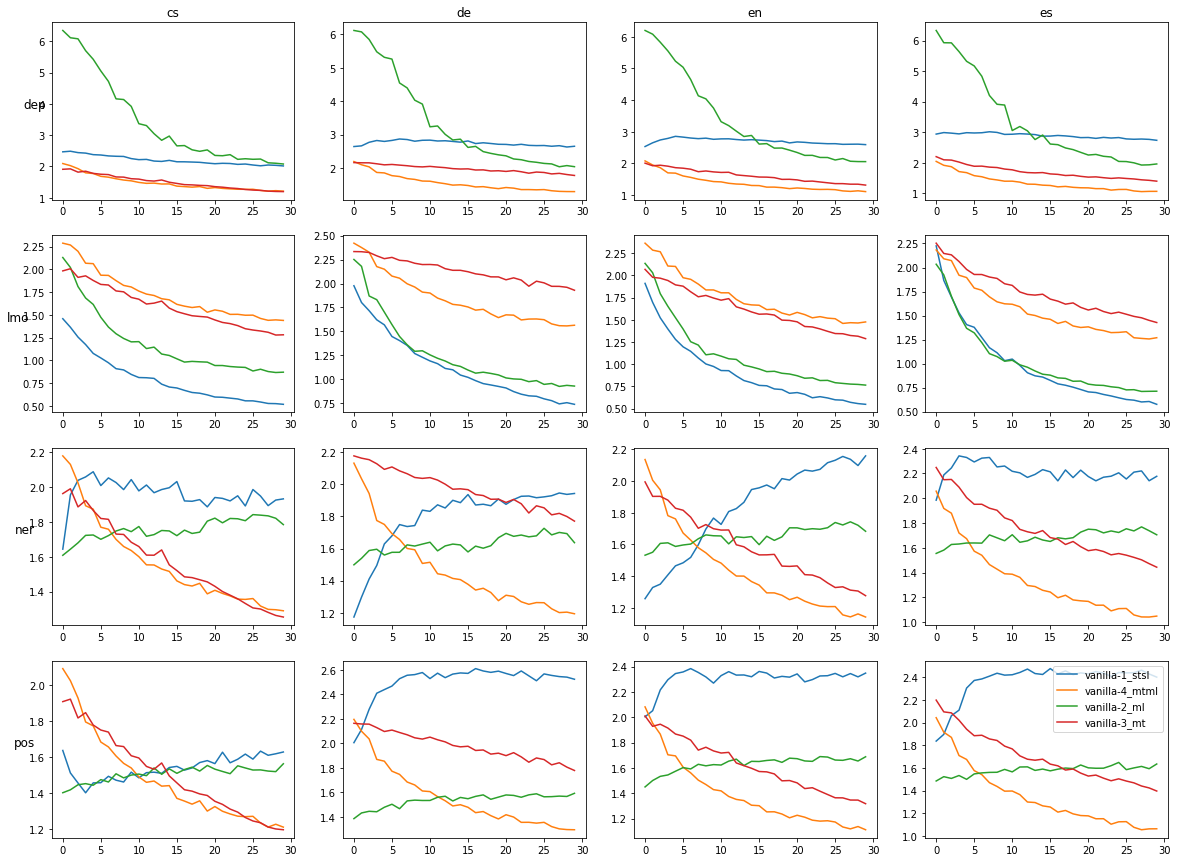

In [23]:
draw_graphs(lambda _: 'cont_repr_norm_avg', tasks, langs, 'train', ['vanilla'])
draw_graphs(lambda _: 'cont_repr_norm_avg', tasks, langs, 'test', ['vanilla'])

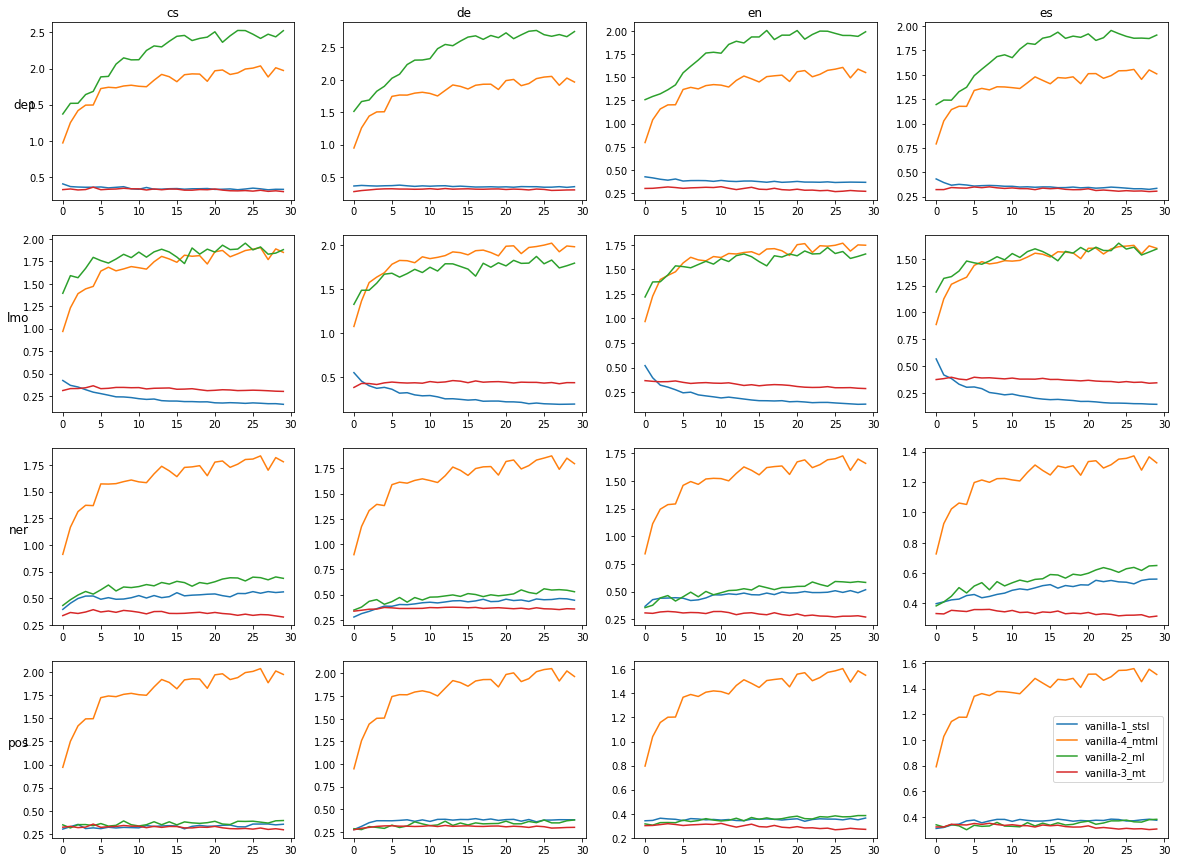

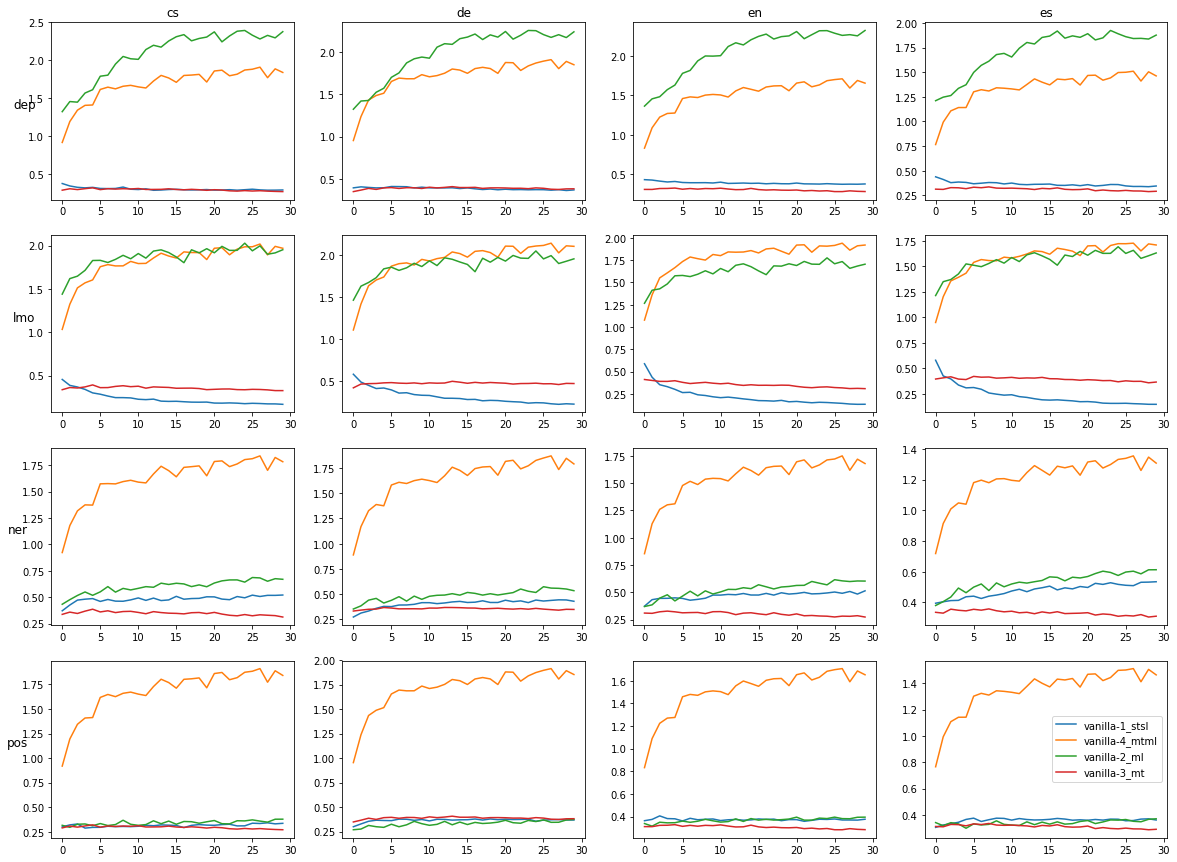

In [24]:
draw_graphs(lambda _: 'cont_repr_norm_std', tasks, langs, 'train', ['vanilla'])
draw_graphs(lambda _: 'cont_repr_norm_std', tasks, langs, 'test', ['vanilla'])

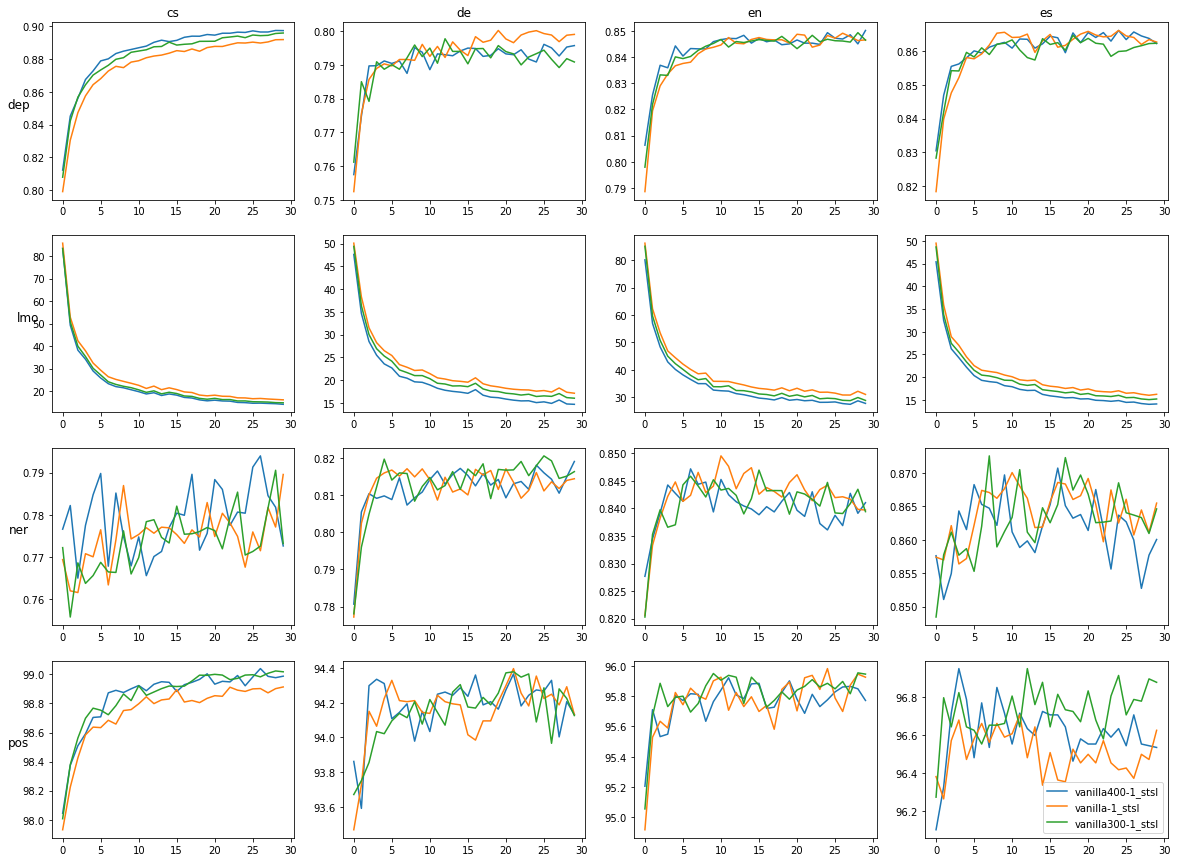

In [36]:
draw_graphs(lambda task: task_metr[task], tasks, langs, 'test',
            run_codes=['vanilla', 'vanilla300', 'vanilla400'],
            run_types=['1_stsl'])

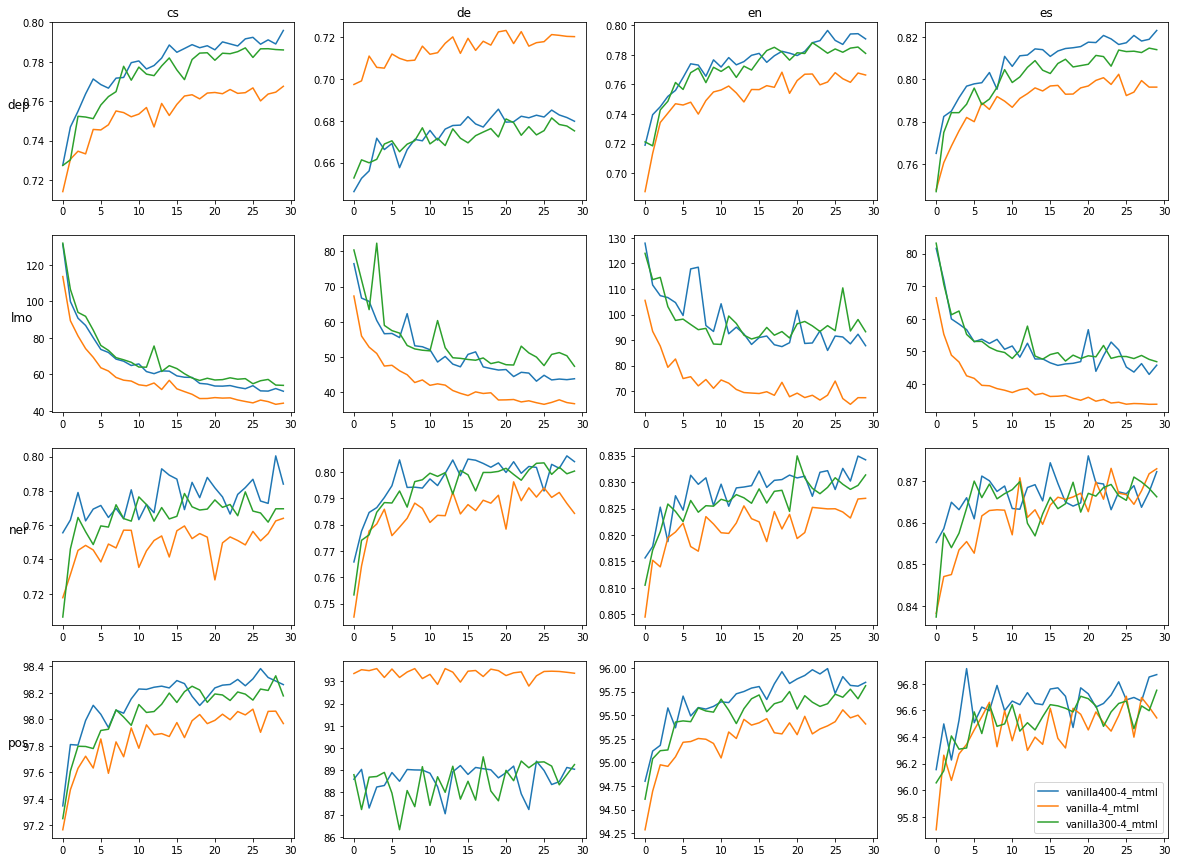

In [37]:
draw_graphs(lambda task: task_metr[task], tasks, langs, 'test',
            run_codes=['vanilla', 'vanilla300', 'vanilla400'],
            run_types=['4_mtml'])

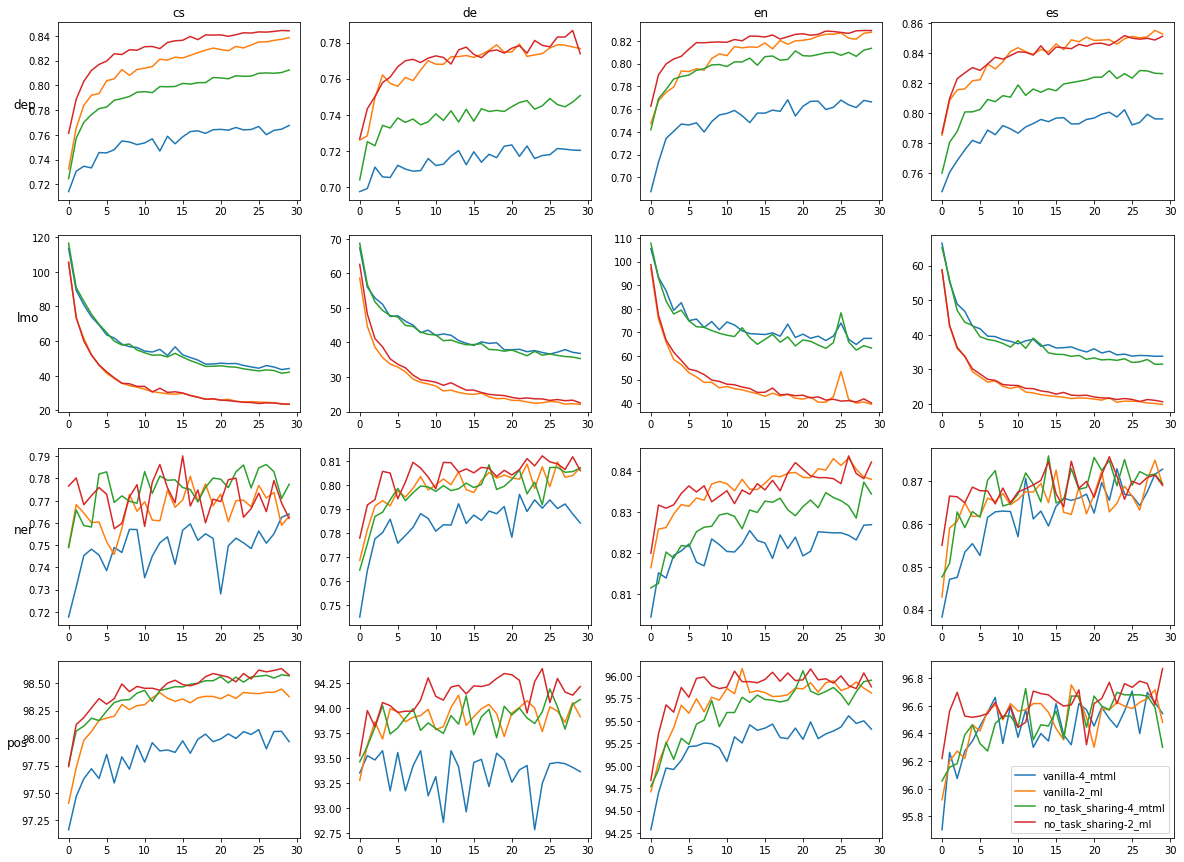

In [40]:
draw_graphs(lambda task: task_metr[task], tasks, langs, 'test',
            run_codes=['vanilla', 'no_task_sharing'],
            run_types=['2_ml', '4_mtml'])